In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
from platforms.pixel_energy import pixel_energy
model = pixel_energy

## Estimate energy from CPU utilization

In [4]:
nrg = model.estimate_from_cpu_util([200, 0, 0, 0])
nrg

{(0,): 118.44444444444444,
 (0, 1): 3.5555555555555554,
 (1,): 0.0,
 (2,): 0.0,
 (2, 3): 0.0,
 (3,): 0.0}

In [5]:
sum(nrg.values())

122.0

In [6]:
nrg = model.estimate_from_cpu_util([0, 0, 200, 0])
nrg

{(0,): 0.0,
 (0, 1): 0.0,
 (1,): 0.0,
 (2,): 118.44444444444444,
 (2, 3): 3.5555555555555554,
 (3,): 0.0}

In [7]:
sum(nrg.values())

122.0

## Find best way to distribute work

In [8]:
tasks = {'task1': 150, 'task2': 400}
placements = model.get_optimal_placements(tasks)
placements

[(0, 400, 150, 0), (400, 0, 150, 0), (0, 400, 0, 150), (400, 0, 0, 150)]

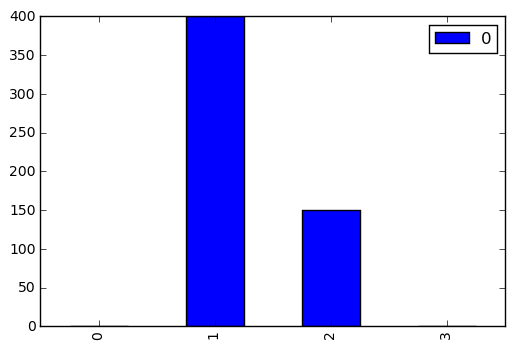

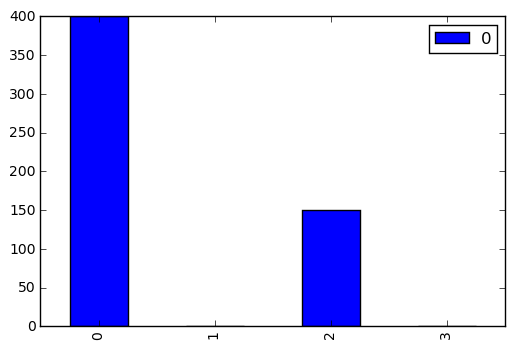

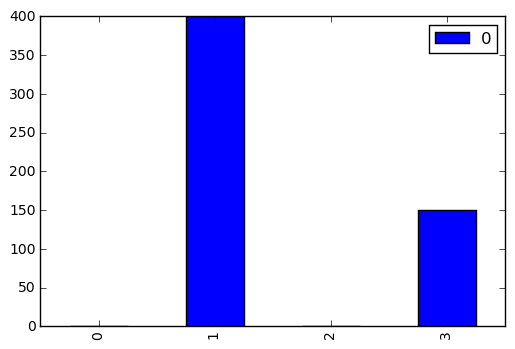

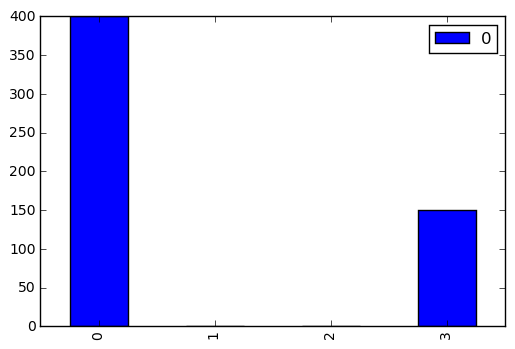

In [9]:
for placement in placements:
    pd.DataFrame(list(placement)).plot(kind='bar')

# Demo `estimate_from_trace`

In [10]:
from trace import Trace
from trappy.plotter import plot_trace
from trappy import ILinePlot
import json
with open('pixel.json') as js:
    pixel = json.load(js)
trace_path = 'pixel_wmig_trace.dat'

In [11]:
trace = Trace(pixel, trace_path, ['sched_load_avg_cpu', 'cpu_idle', 'sched_switch', 'cpu_frequency'])

In [12]:
trace.ftrace.get_filters()

['sched_load_avg_cpu',
 'cpu_frequency',
 'sched_switch',
 'cpu_frequency_devlib',
 'cpu_idle']

In [19]:
est_acc = model.estimate_from_trace(trace, method='accurate').sum(axis=1)
est_sge = model.estimate_from_trace(trace, method='sched_group_energy').sum(axis=1)
ests = pd.DataFrame([est_acc, est_sge], columns=['accurate', 'sched_group_energy'])

In [15]:
def plot(df):
    ILinePlot(df, column=df.columns.tolist(), drawstyle='steps-post').view()

In [26]:
def plot_multiple_series(srss, names):
    ILinePlot([pd.DataFrame(srs) for srs in srss], column=0, drawstyle='steps-post').view()

In [27]:
plot_multiple_series([est_acc, est_sge])

""
""


In [20]:
plot(ests)

""
""
